# **🦴 Bone Fracture Detection Project**

## **Importing libraries**

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter
from roboflow import Roboflow
from ultralytics import YOLO

## **Dataset Download From RoboFlow**

In [ ]:
rf = Roboflow(api_key="OgLHfe0hiccuTIZc28eO")
project = rf.workspace("veda").project("bone-fracture-detection-daoon")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bone-fracture-detection-4 in yolov8:: 100%|██████████| 8308/8308 [00:00<00:00, 12049.47it/s]


## **YOLO Pretrained Model**

In [7]:
model = YOLO('yolov8m.pt')

In [8]:
yaml_path = r"/content/bone-fracture-detection-4/data.yaml"

In [ ]:
model.train(
    data=yaml_path,
    epochs=100,               # Suitable for ~3.6K images
    imgsz=640,                # Standard size
    batch=32,                 # Batch=32 support 16 GB VRAM GPU and Batch=16 support 8 GB VRAM GPU
    patience=10,              # small val set = aggressive early stopping
    lr0=0.001,                # Adam + stable LR
    lrf=0.01,                 # Final LR = 1% of initial
    cos_lr=True,              # cosine annealing improves generalization
    optimizer="Adam",         # Stable any datasets
    augment=True,             # Critical for any image diversity
    pretrained=True,          # Use and Leverage COCO weights
    device=0,                 # GPU 0 (Any GPU)
    amp=True,                 # Mixed precision (saves VRAM)
    workers=4,                # Reduce RAM load
    cache=False,              # Disable caching (saves RAM)
    project="runs/train",     # Logs folder
    name="bone_fracture_exp", # Experiment name
    save=True,                # Save checkpoints
    val=True,                 # Run validation during training
    plots=True,               # Save learning curves & predictions
    close_mosaic=10           # stabilizes last epochs
)

Ultralytics 8.3.194 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/bone-fracture-detection-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bone_fracture_exp_1, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=10, perspective=0.0, plots=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f95941d0650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

## **Validation Set**

In [11]:
!yolo task=detect mode=val model=/content/runs/train/bone_fracture_exp_1/weights/best.pt data=/content/bone-fracture-detection-4/data.yaml

Ultralytics 8.3.194 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 348.8±197.2 MB/s, size: 9.9 KB)
val: Scanning /content/bone-fracture-detection-4/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 348/348 5.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 3.0it/s 7.3s
                   all        348        204       0.41      0.211      0.231     0.0743
        elbow positive         28         29      0.268      0.103     0.0811      0.025
      fingers positive         41         48      0.351      0.167      0.173     0.0477
      forearm fracture         37         43      0.612      0.395      0.447      0.163
               humerus         31         36      0.653      0.417      0.518      0.169
     shoulder fracture        

## **Prediction Set**

In [12]:
!yolo task=detect mode=predict model=/content/runs/train/bone_fracture_exp_1/weights/best.pt source=/content/bone-fracture-detection-4/test/images/


Ultralytics 8.3.194 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/169 /content/bone-fracture-detection-4/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg: 640x256 (no detections), 60.4ms
image 2/169 /content/bone-fracture-detection-4/test/images/image1_0_png.rf.99862308d714bff3f9c410adf5ca93ac.jpg: 480x640 (no detections), 78.9ms
image 3/169 /content/bone-fracture-detection-4/test/images/image1_1000_png.rf.a53c5e186c03961bf88075c6e3e94cf6.jpg: 544x640 (no detections), 75.2ms
image 4/169 /content/bone-fracture-detection-4/test/images/image1_1015_png.rf.3b7320c3c40771fa5532bf713a728b83.jpg: 544x640 (no detections), 34.7ms
image 5/169 /content/bone-fracture-detection-4/test/images/image1_1015_png.rf.9181f8eb07451331e22381bacb3a5bd2.jpg: 640x640 (no detections), 38.2ms
image 6/169 /content/bone-fracture-detection-4/test/images/image1_1033_png.rf.4bbf6

## **Predictions Visualization**


image 1/1 /content/image2_636_png.rf.3a27fb8f5d5892ce33733630521b1e3d.jpg: 544x640 1 shoulder fracture, 36.5ms
Speed: 3.3ms preprocess, 36.5ms inference, 5.3ms postprocess per image at shape (1, 3, 544, 640)


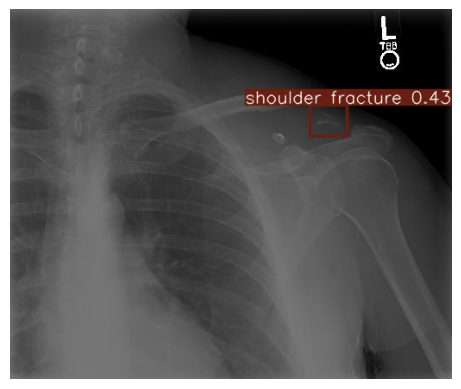

In [ ]:
model = YOLO("/content/runs/train/bone_fracture_exp_1/weights/best.pt")

# prediction
results = model.predict(source="/content/image2_636_png.rf.3a27fb8f5d5892ce33733630521b1e3d.jpg", conf=0.25, save=False)

plt.imshow(results[0].plot())  # bounding boxes + labels draw
plt.axis("off")
plt.show()


image 1/1 /content/image2_849_png.rf.761ec251e358a15e08cdad95fd41492a.jpg: 224x640 1 forearm fracture, 18.5ms
Speed: 1.2ms preprocess, 18.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)


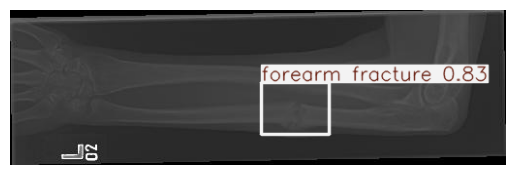

In [18]:
import matplotlib.pyplot as plt

model = YOLO("/content/runs/train/bone_fracture_exp_1/weights/best.pt")

# prediction
results = model.predict(source="/content/image2_849_png.rf.761ec251e358a15e08cdad95fd41492a.jpg", conf=0.25, save=False)

plt.imshow(results[0].plot())  # bounding boxes + labels draw
plt.axis("off")
plt.show()


image 1/1 /content/image2_953_png.rf.97a41890b4badde45bfc390f9f5c9d12.jpg: 640x544 1 forearm fracture, 76.5ms
Speed: 3.3ms preprocess, 76.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)


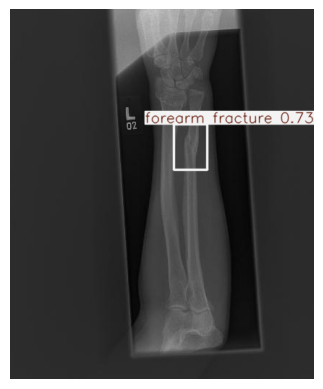

In [21]:
import matplotlib.pyplot as plt

model = YOLO("/content/runs/train/bone_fracture_exp_1/weights/best.pt")

# prediction
results = model.predict(source="/content/image2_953_png.rf.97a41890b4badde45bfc390f9f5c9d12.jpg", conf=0.25, save=False)

plt.imshow(results[0].plot())  # bounding boxes + labels draw
plt.axis("off")
plt.show()


0: 640x640 1 forearm fracture, 29.5ms
1: 640x640 1 fingers positive, 29.5ms
2: 640x640 1 forearm fracture, 29.5ms
3: 640x640 1 forearm fracture, 29.5ms
4: 640x640 1 shoulder fracture, 29.5ms
5: 640x640 1 forearm fracture, 29.5ms
Speed: 2.5ms preprocess, 29.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


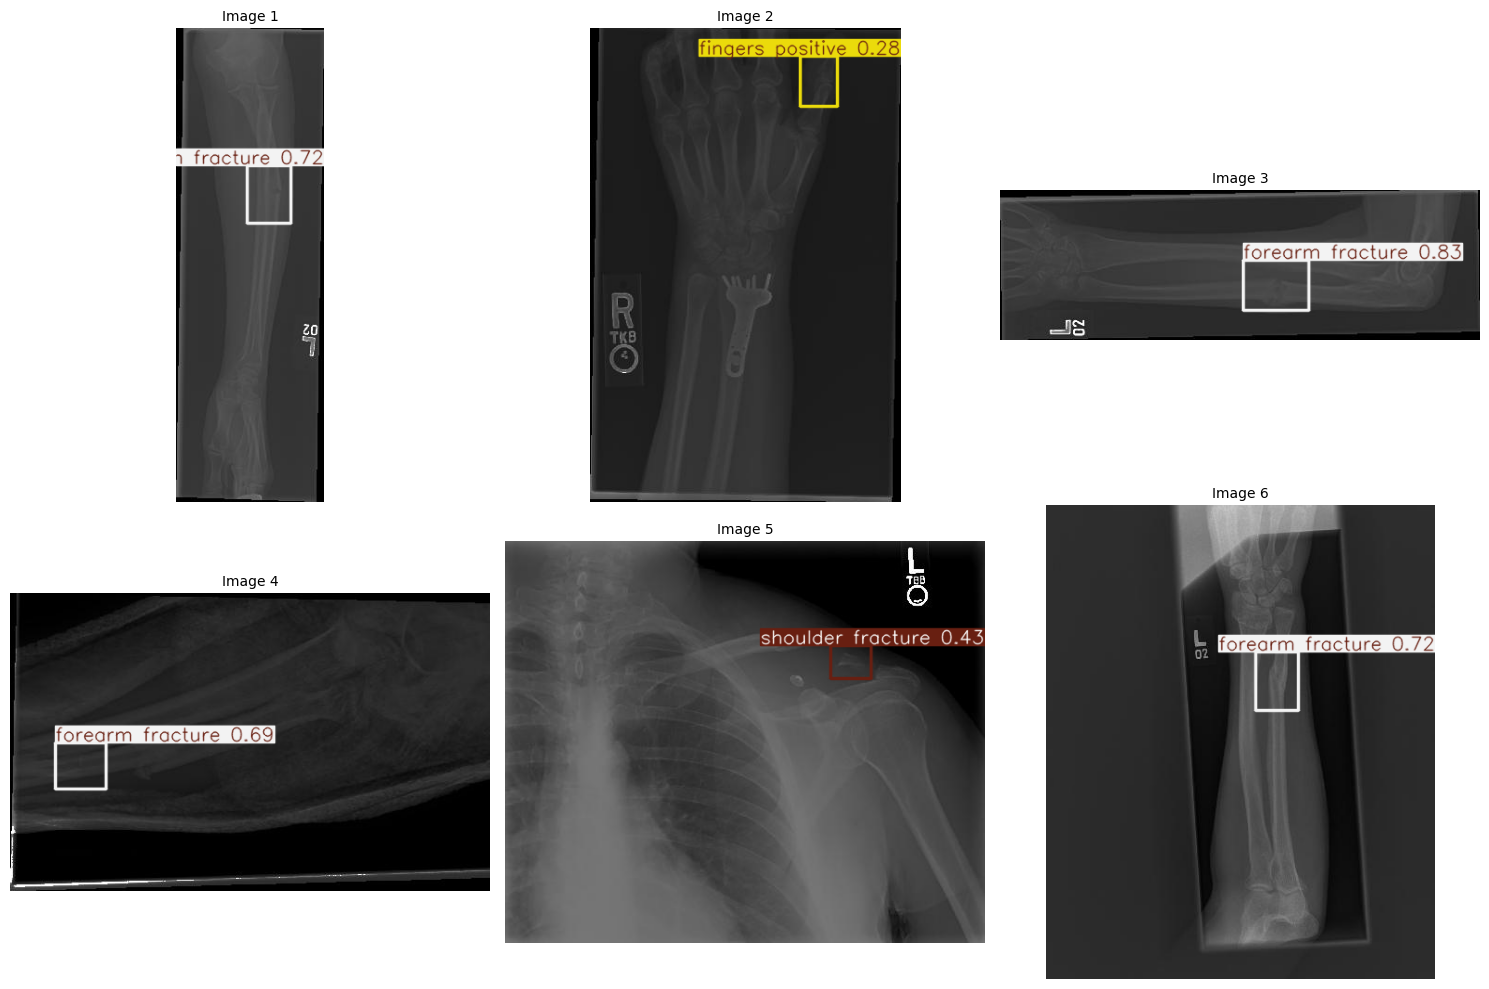

In [ ]:
# trained model
model = YOLO("/content/runs/train/bone_fracture_exp_1/weights/best.pt")

# test images folder
images_folder = "/content/images"

# sabhi images list
image_files = [os.path.join(images_folder, f) for f in os.listdir(images_folder) if f.endswith((".jpg", ".png"))]

# inference
results = model.predict(source=image_files, conf=0.25)

# grid define
cols = 3
rows = (len(results) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

for idx, (ax, res) in enumerate(zip(axes.flat, results)):
    img = res.plot()  # YOLO ka result image (numpy array)
    ax.imshow(img)
    ax.set_title(f"Image {idx+1}", fontsize=10)
    ax.axis("off")
    ax.set_aspect("equal")  # keep square aspect ratio

    # border
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(2)
        spine.set_color("black")

# extra empty subplot hide
for j in range(len(results), rows * cols):
    axes.flat[j].axis("off")

plt.tight_layout()
plt.show()
